Diagnosis for 20211022 experiment, fitting version 5.

In [2]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

Populating the interactive namespace from numpy and matplotlib


## Get residual vectors

In [3]:
def save_fig(filename, fig=None):
    if fig is None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    else:
        fig.savefig(filename, dpi=300, bbox_inches='tight')

In [4]:
T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]

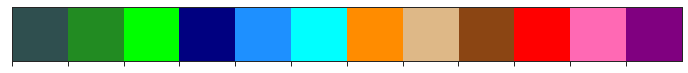

In [5]:
# Create custom palette
palette=['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#ff8c00','#deb887','#8b4513','#ff0000','#ff69b4','#800080',]
sns.palplot(palette)

In [6]:
def get_expected_fit(row):
    function = lambda dH, Tm, x: 1 / (1 + np.exp(dH/0.00198*(Tm**-1 - x)))
#     conds = [x for x in lib2.keys() if x.endswith('_redNorm_median')]
#     vals = np.array(row[conds].values,dtype=float) 
#     errors = np.array(row[errs].values,dtype=float)

    T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]
    T_kelvin=[x+273.15 for x in T_celsius]
    T_inv = np.array([1/x for x in T_kelvin])
    pred_fit = function(row['dH_final'],row['Tm_final'], T_inv)
    
    return pred_fit

In [7]:
lib2 = pd.read_csv(r'/Users/yuxi/workspace/nnn/data/fitted_variant/NNNlib2b_DNA_20211022_v5.CPvariant.gz', sep='\t')
lib2 = lib2.query('RMSE_final < 1')
conds = [x for x in lib2.keys() if x.endswith('_norm')]
errs = [x for x in lib2.keys() if x.endswith('_norm_std')]

In [8]:
lib2.shape

(31822, 58)

In [9]:
def get_residuals(row, conds):
    residuals = row[conds].values - get_expected_fit(row)
    return residuals

residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
lib2[residual_conds] = lib2.apply(lambda row: get_residuals(row, conds), axis=1,result_type='expand')

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/2697185485.py:2: RuntimeWarning: overflow encountered in exp
  function = lambda dH, Tm, x: 1 / (1 + np.exp(dH/0.00198*(Tm**-1 - x)))


In [10]:
lib2.head()

,SEQID,Green14_20_norm,Green14_20_norm_std,Green15_22.5_norm,Green15_22.5_norm_std,Green16_25_norm,Green16_25_norm_std,Green17_27.5_norm,Green17_27.5_norm_std,Green18_30_norm,...,residual_37.5C,residual_40C,residual_42.5C,residual_45C,residual_47.5C,residual_50C,residual_52.5C,residual_55C,residual_57.5C,residual_60C
0,BC0,-0.138808,0.126940,-0.130819,0.144318,-0.108997,0.217057,-0.132276,0.163500,-0.153835,...,-0.130883,-0.093977,-0.083330,-0.095842,-0.066308,-0.023468,-0.074457,-0.051153,-0.030073,-0.063561
1,BC1,-0.088177,0.153139,-0.026094,0.181530,-0.054233,0.214253,-0.036633,0.186208,-0.061795,...,-0.153174,-0.205559,-0.221054,-0.324761,-0.283168,-0.332635,-0.348724,-0.388529,-0.333356,-0.459468
2,BC2,-0.011455,0.232782,0.000825,0.180591,0.021877,0.364618,0.064680,0.230905,0.083584,...,-0.196020,-0.162161,-0.188219,-0.170979,-0.223307,-0.228098,-0.326293,-0.244858,-0.252220,-0.184023
3,BC3,-0.048672,0.252318,-0.030815,0.176781,-0.046238,0.347769,-0.040474,0.307029,-0.049103,...,-0.068251,-0.041945,-0.048144,-0.081840,-0.047047,-0.030059,-0.066285,-0.011295,-0.005543,0.022567
4,BC4,-0.037135,0.192135,-0.025559,0.180159,0.007286,0.258787,0.008959,0.215012,-0.039662,...,-0.119453,-0.083455,-0.105055,-0.113717,-0.099051,-0.093008,-0.151797,-0.105598,-0.166239,-0.153297


In [11]:
print('min residual:\n'), lib2[residual_conds].agg('min'), print('\nmax residual:\n'), lib2[residual_conds].agg('max')

min residual:


max residual:



(None,
 residual_20C     -0.392686
 residual_22.5C   -0.303580
 residual_25C     -0.277753
 residual_27.5C   -0.238603
 residual_30C     -0.286813
 residual_32.5C   -0.306291
 residual_35C     -0.366097
 residual_37.5C   -0.410862
 residual_40C     -0.424704
 residual_42.5C   -0.443538
 residual_45C     -0.537851
 residual_47.5C   -0.564767
 residual_50C     -0.622699
 residual_52.5C   -0.626497
 residual_55C     -0.682853
 residual_57.5C   -0.674965
 residual_60C     -0.851002
 dtype: float64,
 None,
 residual_20C      0.775824
 residual_22.5C    0.462428
 residual_25C      0.520772
 residual_27.5C    0.486968
 residual_30C      0.476135
 residual_32.5C    0.451261
 residual_35C      0.481270
 residual_37.5C    0.371229
 residual_40C      0.404850
 residual_42.5C    0.465375
 residual_45C      0.536336
 residual_47.5C    0.493294
 residual_50C      0.567275
 residual_52.5C    0.666421
 residual_55C      0.749935
 residual_57.5C    0.889520
 residual_60C      0.936789
 dtype: float64)

## UMAP visualization

In [12]:
import umap

import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

hover_data=['SEQID', 'n_clusters','dH_final', 'Tm_final', 'RMSE_final']

In [13]:
%%time
np.random.seed(42)
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='euclidean').fit_transform(lib2[residual_conds])
lib2[['UMAP_1', 'UMAP_2']] = embedding

CPU times: user 38.2 s, sys: 2.2 s, total: 40.4 s
Wall time: 12.4 s


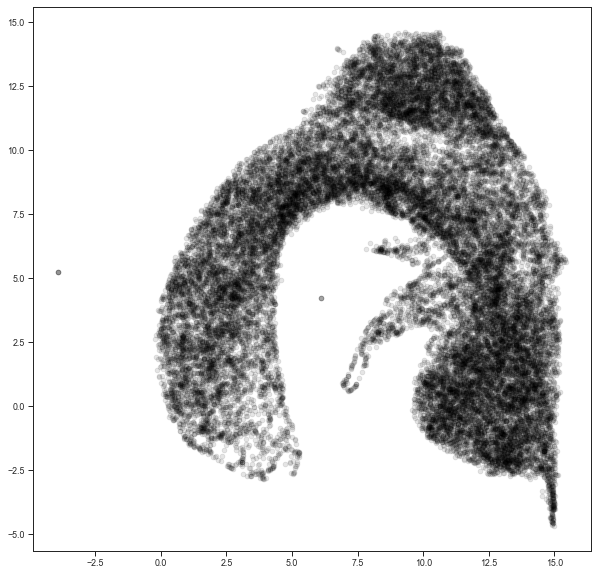

In [22]:
fig, ax = subplots(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], color='k', alpha=0.1)

In [73]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='series', 
                 hover_data=hover_data,
                 width=1100, height=1000)
fig.write_html("../fig/residual_UMAP_series.html")
fig.write_image("../fig/residual_UMAP_series.png")
fig.show()

In [65]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='Tm', size='RMSE',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1200, height=1000, range_color=[273,373],
                 title='UMAP of residuals across temperatures')

fig.write_html("../fig/residual_UMAP_RMSEsize_Tmcolor.html")
fig.write_html("../fig/residual_UMAP_RMSEsize_Tmcolor.png")
fig.show()

In [74]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='Tm',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1100, height=1000, range_color=[273,373],
                 title='UMAP of fitting residuals across temperatures')

fig.write_html("../fig/residual_UMAP_Tm-color.html")
fig.write_image('../fig/residual_UMAP_Tm-color.png')
fig.show()

In [71]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='RMSE',
                 hover_data=['RefSeq', 'n_clusters_signal', 'dH', 'dS', 'Tm', 'RMSE'],
                 width=1000, height=1000, range_color=[0,0.15],
                 title='UMAP of fitting residuals across temperatures')

fig.write_html("../fig/residual_UMAP_RMSE-color.html")
fig.write_image("../fig/residual_UMAP_RMSE-color.png")
fig.show()

In [18]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='dG_37C',
                 hover_data=hover_data,
                 width=1100, height=1000, range_color=[-10, 10],
                 title='UMAP of fitting residuals across temperatures')

fig.write_html("../fig/residual_UMAP_dG_37C-color.html")
# fig.write_image("../fig/residual_UMAP_dG_37C-color.png")
fig.show()

## Louvain clustering

In [14]:
from sklearn import cluster

from sklearn.neighbors import kneighbors_graph
from community import best_partition
import networkx as nx

In [15]:
%%time
A = kneighbors_graph(lib2[residual_conds].values, n_neighbors=7, p=1)
G = nx.from_scipy_sparse_matrix(A)

CPU times: user 17.3 s, sys: 3.58 s, total: 20.9 s
Wall time: 21.1 s


In [16]:
%%time
partition = best_partition(G, resolution=1)

CPU times: user 32.2 s, sys: 189 ms, total: 32.4 s
Wall time: 32.4 s


In [17]:
n_cluster = len(np.unique(list(partition.values())))
n_cluster

11

In [18]:
cluster_lbl = ['%02d' % lbl for lbl in list(partition.values())]
lbl_color_map = {'%02d' % i: palette[i] for i in range(n_cluster)}
lib2['cluster'] = cluster_lbl

In [19]:
fig = px.scatter(lib2, x='UMAP_1', y='UMAP_2', color='cluster', #size='RMSE',
                 hover_data=hover_data,
                 width=1000, height=1000, #range_color=[273,373],
                 color_discrete_map=lbl_color_map,
                 title='Louvain clusters of fitting residuals across temperatures')

fig.write_html("./fig/residual_UMAP_clusters_resolution1.html")
# fig.write_image('./fig/residual_UMAP_clusters.png')
fig.show()

In [20]:
lbls = list(lib2.groupby('cluster').aggregate('mean')[residual_conds].index)

In [21]:
lib2.groupby('cluster').aggregate('mean')[residual_conds]

,residual_20C,residual_22.5C,residual_25C,residual_27.5C,residual_30C,residual_32.5C,residual_35C,residual_37.5C,residual_40C,residual_42.5C,residual_45C,residual_47.5C,residual_50C,residual_52.5C,residual_55C,residual_57.5C,residual_60C
cluster,,,,,,,,,,,,,,,,,
00,-0.084076,-0.057536,-0.061359,-0.071401,-0.102047,-0.050636,-0.072639,-0.087662,-0.072064,-0.082366,-0.083461,-0.057228,-0.032440,-0.059565,-0.030167,-0.008170,-0.030842
01,-0.244390,-0.186399,-0.154275,-0.096949,-0.056843,-0.061742,-0.034044,-0.066807,-0.045952,-0.003029,-0.052302,-0.037192,-0.034360,-0.040829,-0.038747,-0.027836,0.000002
02,-0.080970,-0.058547,-0.064212,-0.078625,-0.114000,-0.073111,-0.106949,-0.133747,-0.142917,-0.163360,-0.208923,-0.217046,-0.234271,-0.278775,-0.288417,-0.302500,-0.343813
03,-0.054319,-0.037634,-0.045281,-0.066331,-0.108571,-0.080856,-0.120848,-0.141784,-0.134634,-0.111497,-0.142081,-0.124943,-0.127594,-0.154399,-0.166985,-0.171010,-0.195032
04,-0.031745,0.014380,0.039827,0.081865,0.106237,0.115580,0.116725,0.075003,0.085882,0.121165,0.059825,0.062573,0.051969,0.041932,0.026022,0.026194,0.029839
05,-0.043544,-0.036877,-0.044817,-0.063768,-0.095296,-0.067016,-0.086620,-0.083698,-0.059282,-0.013370,-0.050590,-0.034972,-0.038306,-0.057158,-0.066156,-0.056776,-0.061868
06,-0.037977,-0.021773,-0.023797,-0.038582,-0.069877,-0.034027,-0.062681,-0.062136,-0.045231,-0.017243,-0.026507,0.007071,0.025371,0.010183,0.021998,0.029766,0.021628
07,-0.046556,-0.025441,-0.012243,0.004900,0.011195,0.038934,0.035756,0.029013,0.049724,0.095619,0.046007,0.055802,0.050044,0.034680,0.027089,0.036375,0.038770
08,0.013285,0.025259,0.029441,0.023015,0.007558,0.016827,-0.007886,-0.013126,0.002462,0.051517,0.013581,0.042326,0.050850,0.046154,0.058312,0.100562,0.132316


### Visualization

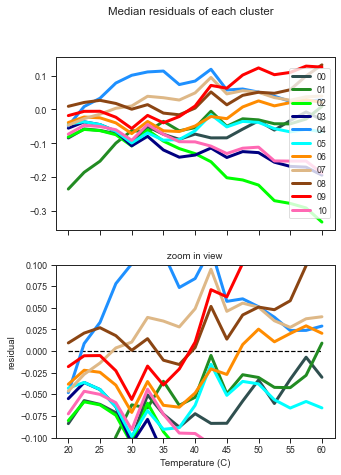

In [22]:
fi, ax = plt.subplots(2, 1, sharex=True, figsize=(5,7))
plt.suptitle('Median residuals of each cluster')
ax[1].plot([T_celsius[0], T_celsius[-1]], [0, 0], 'k--')
for i in range(n_cluster):
    ax[0].plot(T_celsius, lib2.groupby('cluster').aggregate('median').loc['%02d'%i, residual_conds].values, color=lbl_color_map['%02d'%i], lw=3)
    ax[1].plot(T_celsius, lib2.groupby('cluster').aggregate('median').loc['%02d'%i, residual_conds].values, color=lbl_color_map['%02d'%i], lw=3)
plt.ylim([-0.1, 0.1])
ax[0].legend(['%02d'%i for i in range(n_cluster)], loc='right')
ax[1].set_title('zoom in view')
plt.xlabel('Temperature (C)')
plt.ylabel('residual')

plt.savefig('./fig/median_residuals_of_each_cluster.png')

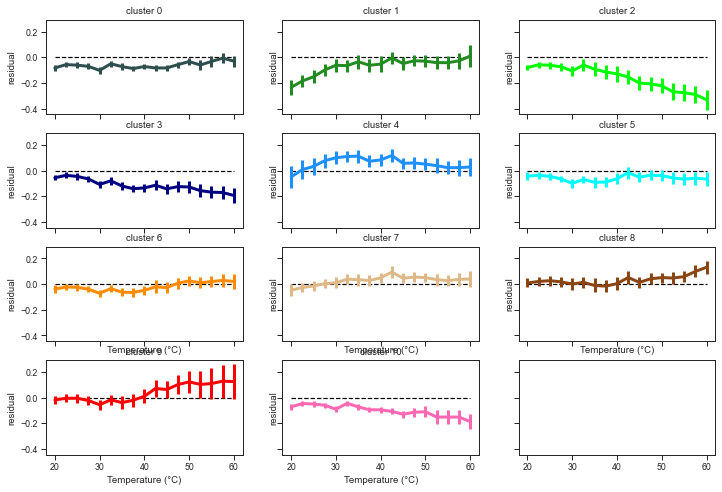

In [23]:
fig, ax = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(12,8))
ax = ax.flatten()
for i in range(n_cluster):
    ax[i].plot([T_celsius[0], T_celsius[-1]], [0, 0], 'k--')
    errors = lib2.groupby('cluster').aggregate('std').loc['%02d'%i, residual_conds].values
    ax[i].errorbar(T_celsius, lib2.groupby('cluster').aggregate('median').loc['%02d'%i, residual_conds].values, yerr=errors,fmt='-', color=lbl_color_map['%02d'%i], lw=3)
#     plt.ylim([-0.1, 0.1])
    if i > 5:
        ax[i].set_xlabel('Temperature (°C)')
    ax[i].set_ylabel('residual')
    ax[i].set_title('cluster %d' % i)
    
# ax[-1].legend([str(i) for i in range(n_cluster)], loc='right')

plt.savefig('./fig/median_residuals_of_each_cluster.png')

In [24]:
agg_col = ['n_clusters', 'dH_final', 'Tm_final', 'RMSE_final']
cluster_median = lib2.groupby('cluster').aggregate('median')[agg_col]
cluster_median

,n_clusters,dH_final,Tm_final,RMSE_final
cluster,,,,
00,107.0,-30.964452,335.425341,0.118136
01,95.5,-1125.782628,285.841078,0.731910
02,99.0,-48.993040,318.394266,0.117947
03,97.0,-36.216816,313.811834,0.146686
04,94.0,-11.617535,290.459317,0.256719
05,96.0,-30.020622,308.841165,0.156784
06,97.0,-20.507598,320.048427,0.156134
07,96.0,-14.105093,301.186072,0.175582
08,97.0,-11.368023,299.704455,0.181322


In [25]:
lib2['Tm_Celsius'] = lib2['Tm_final'] - 273.15

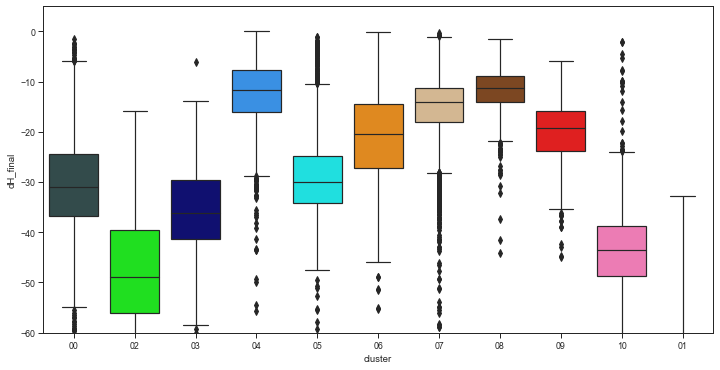

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=lib2, x='cluster', y='dH_final', palette=lbl_color_map)
plt.ylim([-60, 5])
plt.show()

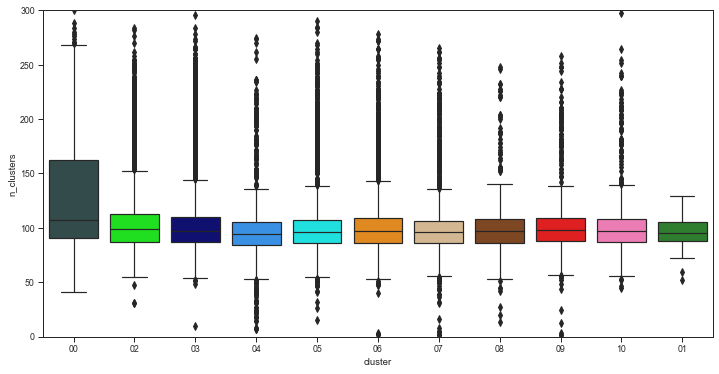

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=lib2, x='cluster', y='n_clusters', palette=lbl_color_map)
plt.ylim([0, 300])
plt.savefig('./fig/n_cluster_signal_per_cluster.png')

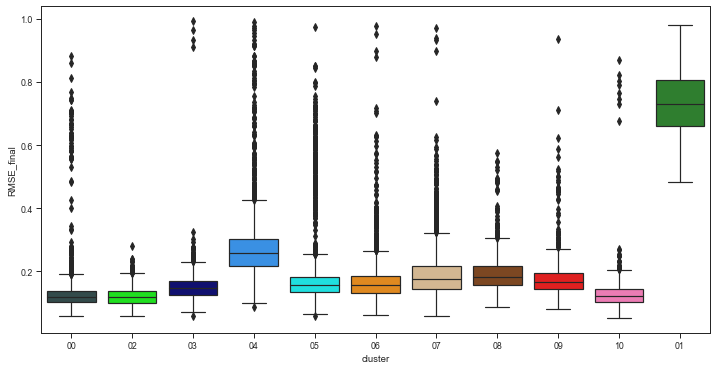

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=lib2, x='cluster', y='RMSE_final', palette=lbl_color_map)
# plt.ylim([0, 300])
plt.savefig('./fig/RMSE_per_cluster.png')

In [29]:
np.sum(lib2[lib2['cluster'] == '01']['n_clusters'] == 1)

0

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='n_clusters'>

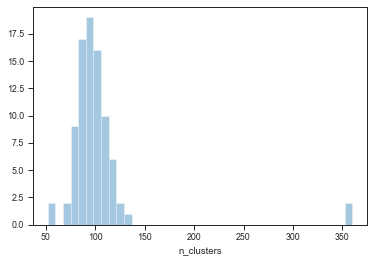

In [30]:
sns.distplot(lib2[lib2['cluster'] == '01']['n_clusters'], kde=False, rug=False)

ValueError: Could not interpret input 'Series'

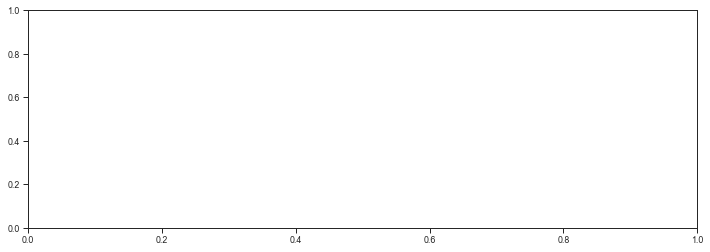

In [41]:
fig, ax = subplots(figsize=(12,4))
sns.countplot(data=lib2[lib2['cluster'] == '04'], x='Series')

plt.savefig("../fig/cluster4_series_countplot.png")


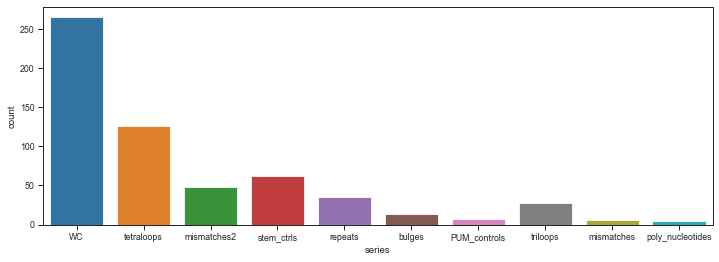

In [80]:
fig, ax = subplots(figsize=(12,4))
sns.countplot(data=lib2[lib2['cluster'] == '7'], x='series')

plt.savefig("../fig/cluster7_series_countplot.png", dpi=800)


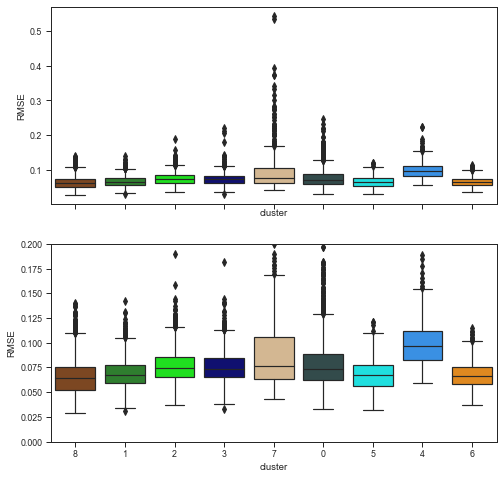

In [27]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,8))
sns.boxplot(data=lib2, x='cluster', y='RMSE', palette=lbl_color_map, ax=ax[0])
sns.boxplot(data=lib2, x='cluster', y='RMSE', palette=lbl_color_map, ax=ax[1])
plt.ylim([0, 0.2])
plt.savefig('../fig/RMSE_per_cluster.png', dpi=600)

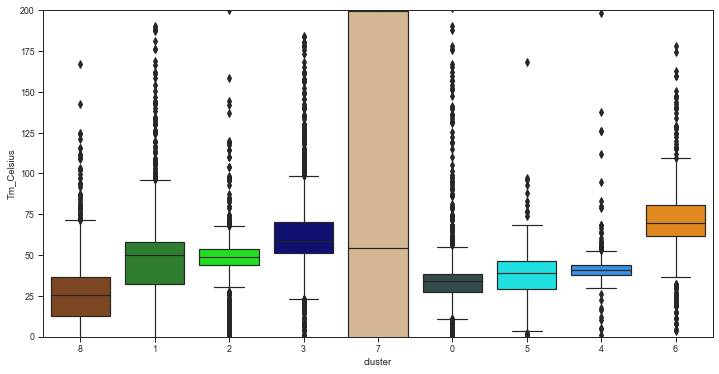

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(data=lib2, x='cluster', y='Tm_Celsius', palette=lbl_color_map, ax=ax)
# sns.boxplot(data=lib2, x='cluster', y='Tm_Celsius', palette=lbl_color_map, ax=ax[1])
plt.ylim([0, 200])
plt.show()

#### Size of the clusters

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



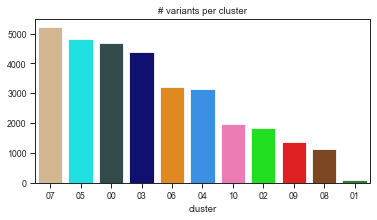

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))
size_counts = lib2.value_counts('cluster')
sns.barplot(size_counts.index, size_counts, palette=lbl_color_map, ax=ax)
# sns.boxplot(data=lib2, x='cluster', y='Tm_Celsius', palette=lbl_color_map, ax=ax[1])
# plt.ylim([0, 200])
plt.title('# variants per cluster')

plt.savefig('./fig/size_of_clusters.png', dpi=600)
plt.show()

ValueError: Could not interpret value `dH` for parameter `x`

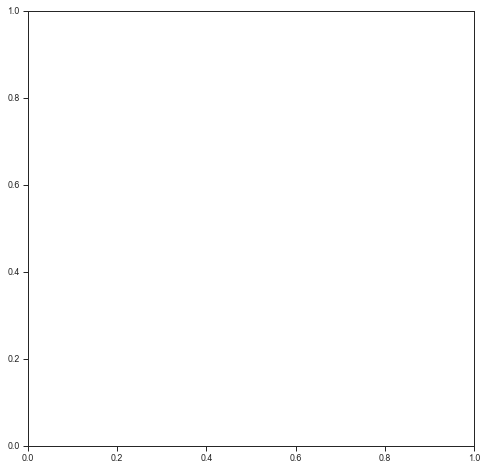

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=cluster_median, x='dH', y='dS', hue='cluster', s=400, palette=lbl_color_map)
for i in range(n_cluster):
    plt.text(cluster_median.loc[str(i),'dH'], cluster_median.loc[str(i),'dS'], str(i), 
             size='large', weight='bold', color=(.2,.2,.2), ha='center', va='center')

plt.savefig("./fig/dH-dS.png")

In [33]:
from scipy.spatial.distance import cdist

In [34]:
def get_representative_variants(df, n_variant=10, method='median', metric='euclidean'):
    """
    Get the id of the variants nearest to the cluster center.
    WARNING: `variant_id` are the row LOCATIONS, not indeces
    Args:
        df - dataframe
        n_variant - int, #nearest variants to return
        method - str, 'median' or 'mean'
        metric - str
    Returns:
        variant_id - (n_cluster, n_variant) np.array
    """
    varaint_id = []
    residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
    
    centroid = df.groupby('cluster').aggregate(method)[residual_conds]
    distances = cdist(centroid[residual_conds], df[residual_conds], metric=metric)
    is_in_cluster = np.zeros_like(distances, dtype=bool)
    for i in range(distances.shape[0]):
        is_in_cluster[i, :] = (df['cluster'] == '%02d'%i)
        
    distances[np.logical_not(is_in_cluster)] = np.inf
    variant_id = np.argsort(distances, axis=1)[:, :n_variant]
    
    return variant_id

In [35]:
def get_worst_variants(df, n_variant=10):
    """
    Get the id of the variants with the worst RMSE in each cluster.
    WARNING: `variant_id` are the row INDICES, not the locations
    Args:
        df - dataframe
        n_variant - int, #variants to return
    Returns:
        variant_id - (n_cluster, n_variant) np.array
    """

    residual_conds = ['residual_{}C'.format(t) for t in T_celsius]
    n_cluster = len(np.unique(df['cluster']))
    variant_id = np.zeros((n_cluster, n_variant), dtype=int)
    for i in range(n_cluster):
        variant_id[i, :] = df[df['cluster'] == '%02d'%i].nlargest(n_variant, 'RMSE_final').index.tolist()
    
    return variant_id

In [46]:
def plot_actual_and_expected_fit(row, ax, c='k'):
    function = lambda dH, Tm, fmax, fmin, x: fmin + (fmax - fmin) / (1 + np.exp(dH/0.00198*(Tm**-1 - x)))

    vals = np.array(row[conds].values,dtype=float) 
    errors = np.array(row[errs].values / np.sqrt(row['n_clusters']),dtype=float)

    T_celsius=[20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]
    T_kelvin=[x+273.15 for x in T_celsius]
    T_inv = np.array([1/x for x in T_kelvin])
    pred_fit = function(row['dH_final'],row['Tm_final'], row['fmax_final'], row['fmin_final'], T_inv)
    
    ax.set_xlim([13,62])
    ax.set_ylim([-0.1,1.4])

    ax.errorbar(T_celsius, vals, yerr=errors,fmt='.',c=c)
    ax.plot(T_celsius, pred_fit, c=c, lw=3)
    ax.set_title('RMSE: %.3f  [%d%d]'% (row['RMSE_final'], row['enforce_fmax'], row['enforce_fmin']))


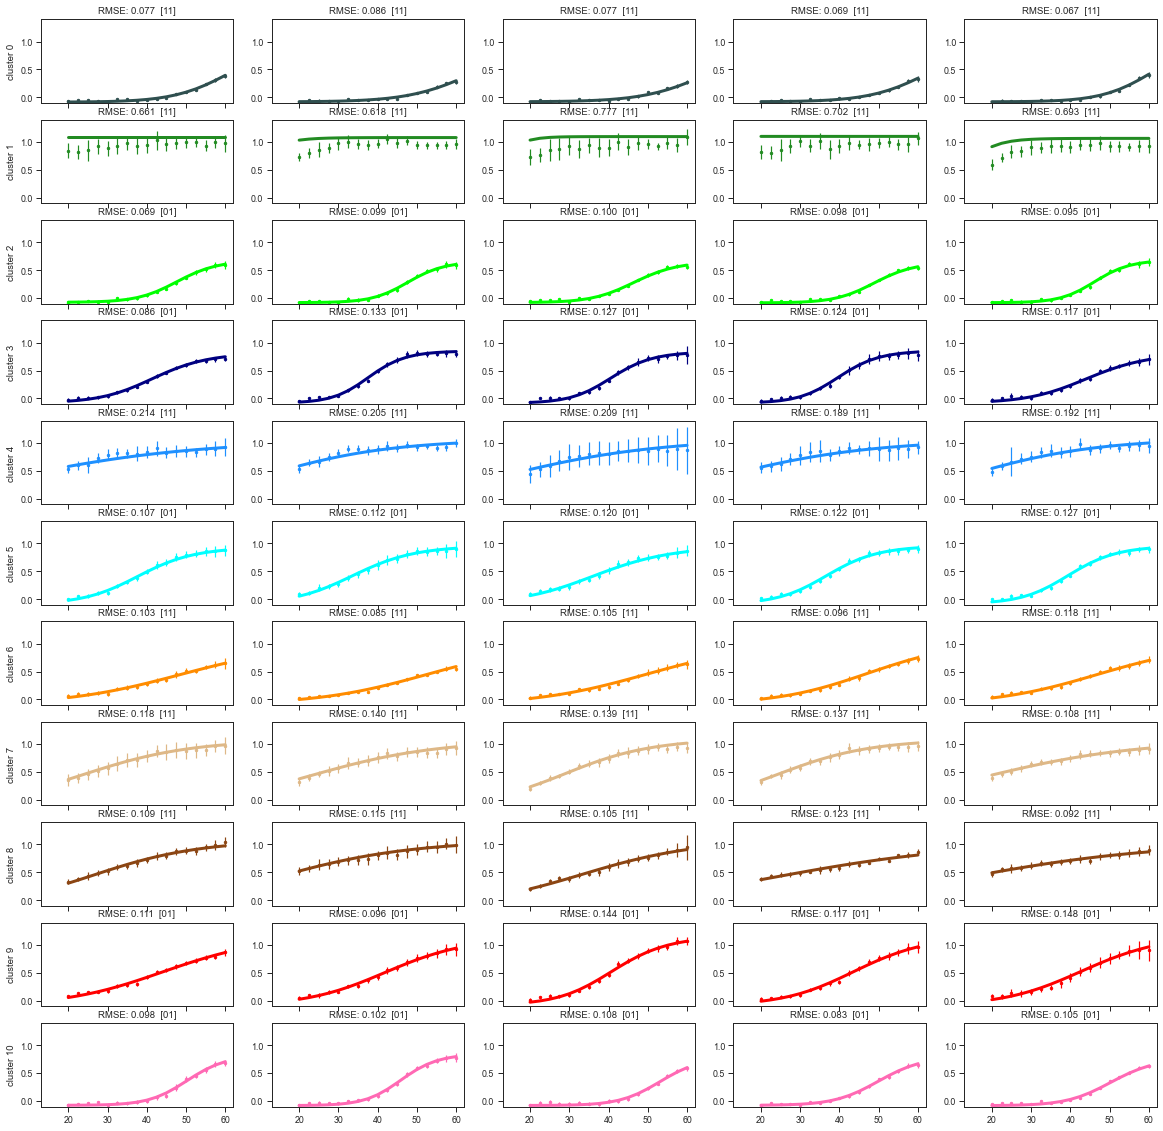

In [48]:
n_variant_plot = 5
variant_id = get_representative_variants(lib2)

fig, ax = plt.subplots(n_cluster, n_variant_plot, sharex=True, sharey=False , figsize=(20,20))
# fig.suptitle('Representative resuduals of each cluster')
for i in range(n_cluster):
    ax[i,0].set_ylabel('cluster %d' % i)
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.iloc[variant_id[i,j], :], ax[i,j], c=lbl_color_map['%02d'%i])

save_fig('./fig/representative_melting_curve_plots_v5.pdf')
# fig.show()

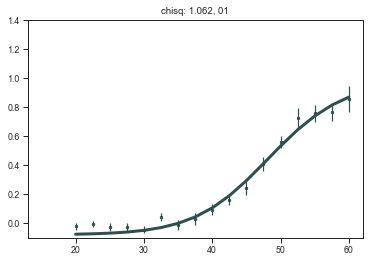

In [38]:
fig, ax = plt.subplots()
plot_actual_and_expected_fit(lib2.loc[18088, :], ax, c=lbl_color_map['00'])

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp



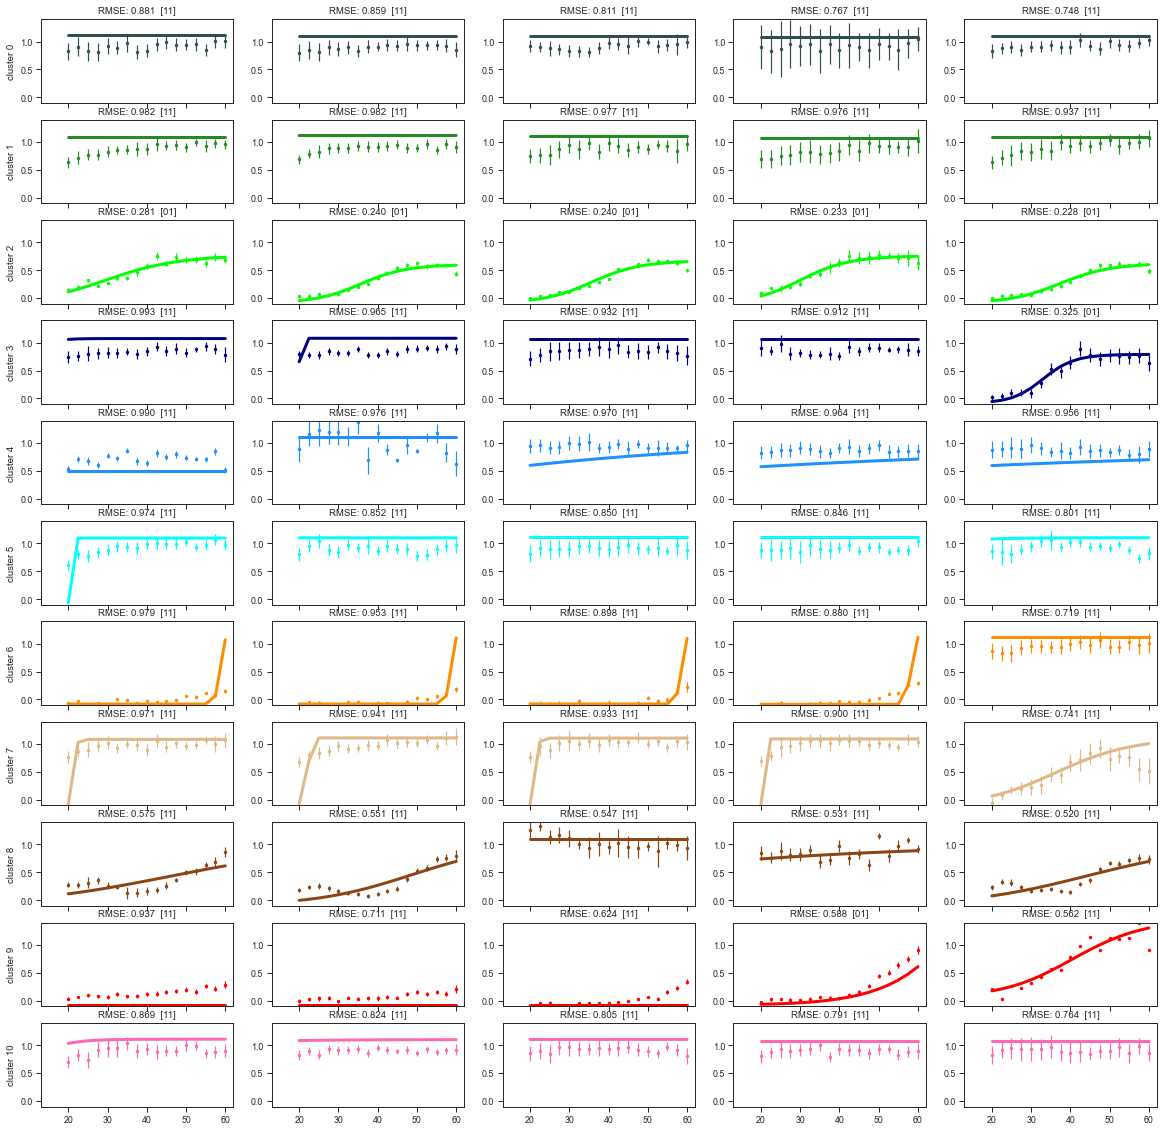

In [49]:
# WORST variants
n_variant_plot = 5
variant_id = get_worst_variants(lib2, n_variant_plot)

fig, ax = plt.subplots(n_cluster, n_variant_plot, sharex=True, sharey=False , figsize=(20,20))
# fig.suptitle('Representative resuduals of each cluster')
for i in range(n_cluster):
    ax[i,0].set_ylabel('cluster %d' % i)
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.loc[variant_id[i,j], :], ax[i,j], c=lbl_color_map['%02d'%i])

save_fig('./fig/worst_melting_curve_plots.pdf')
# fig.show()

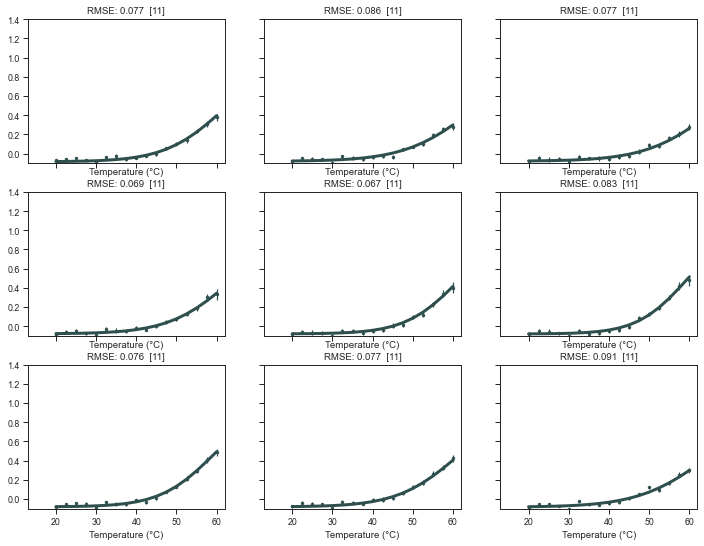

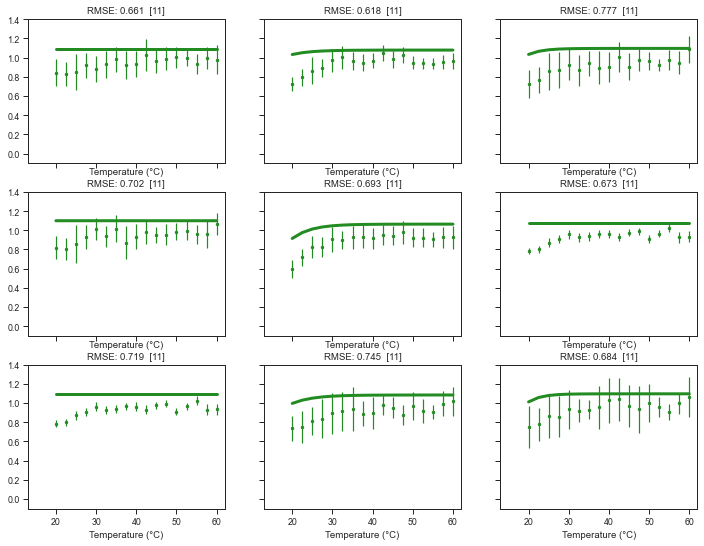

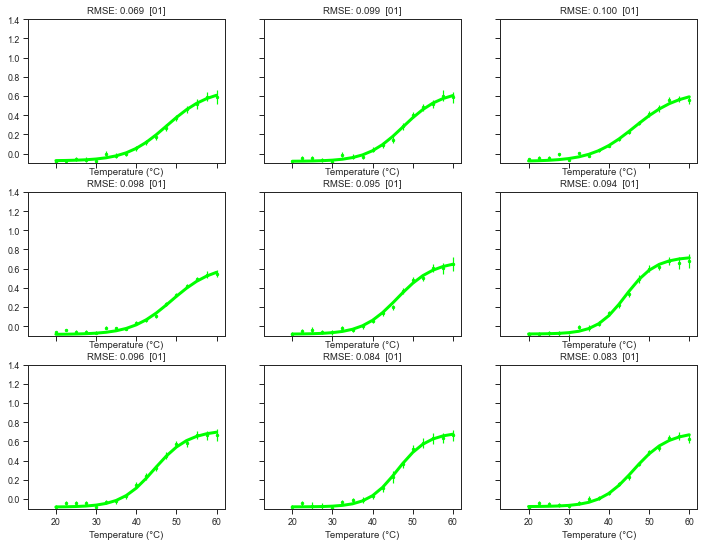

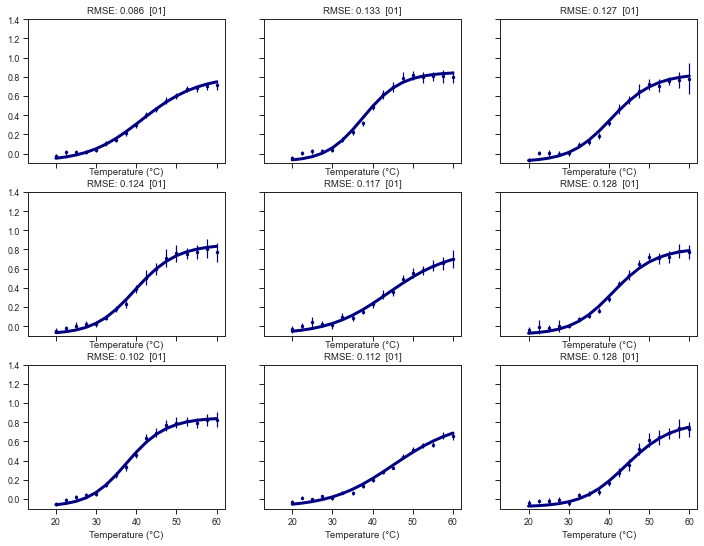

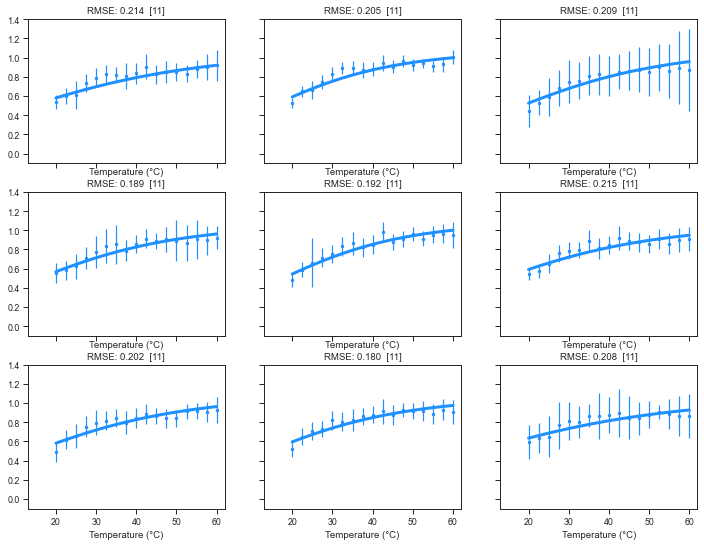

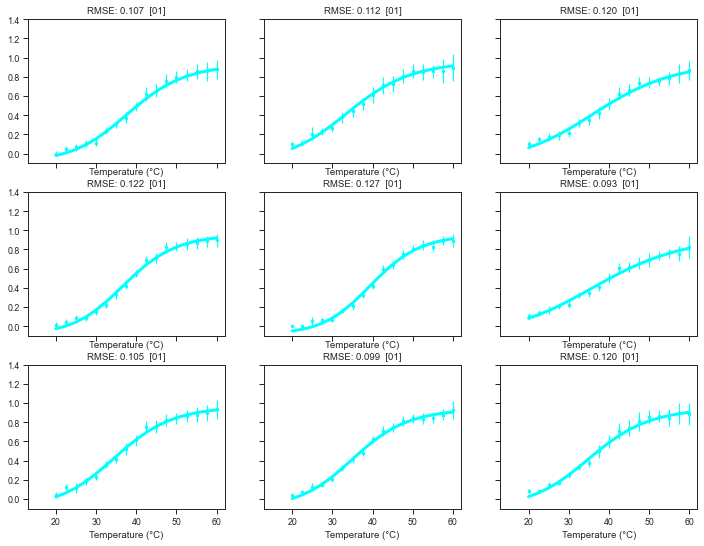

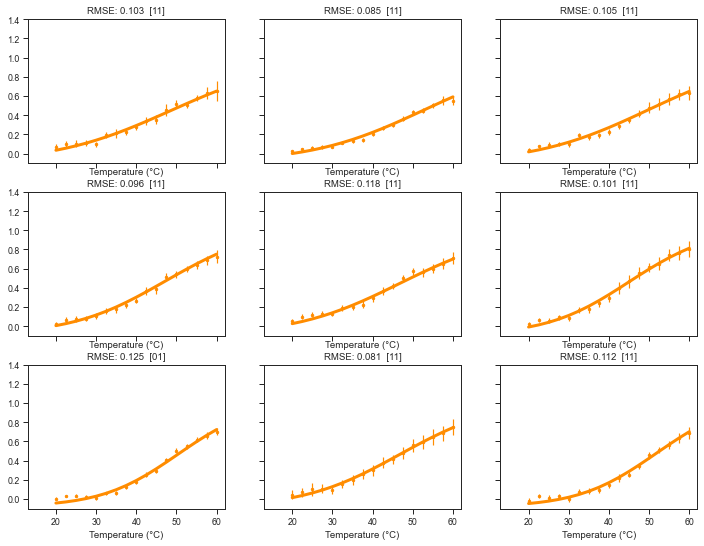

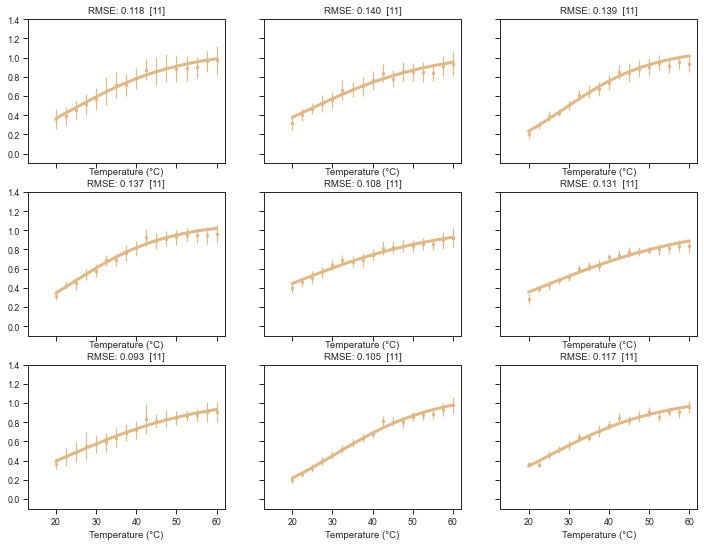

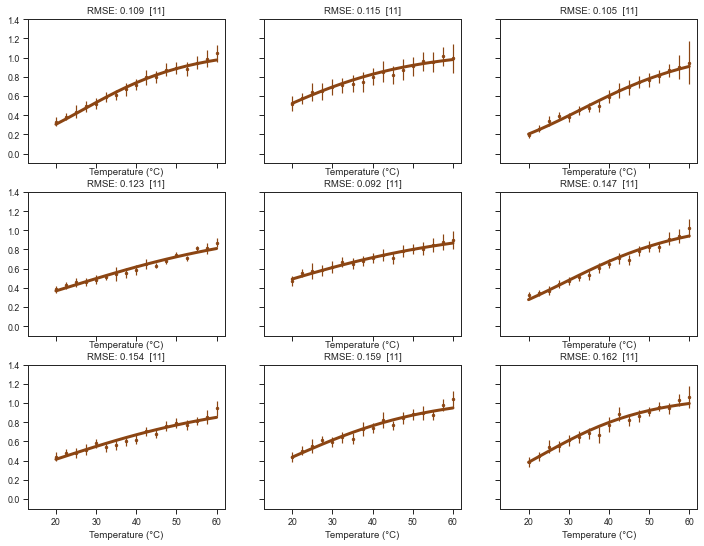

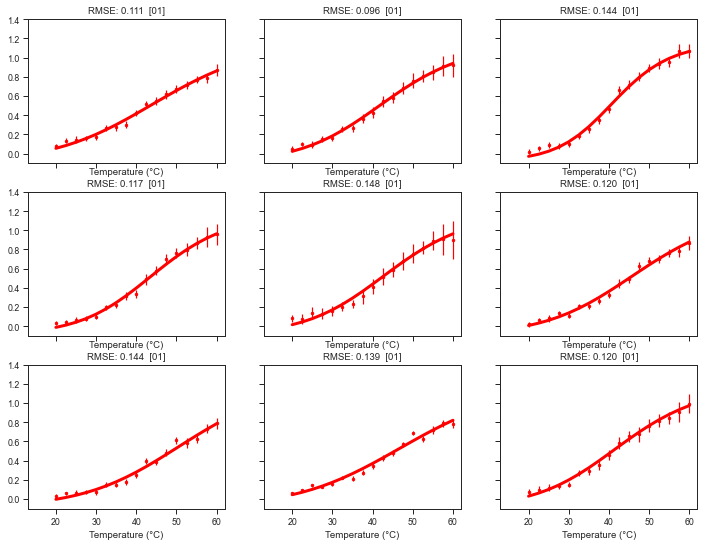

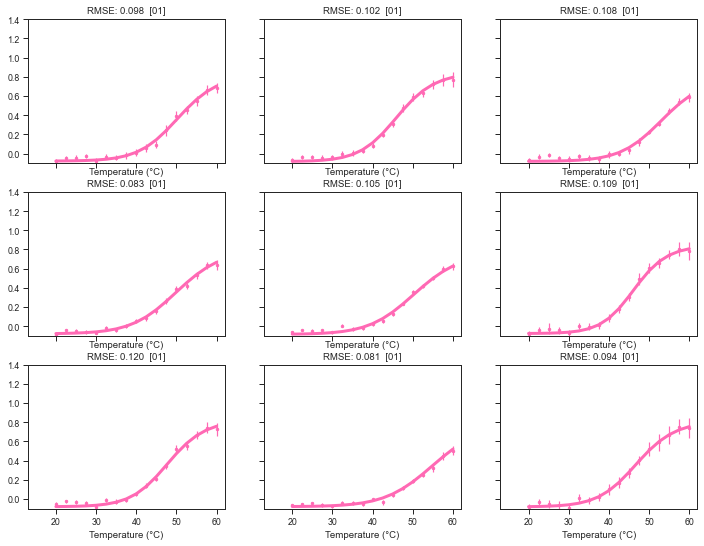

In [50]:
n_variant_plot = 9
variant_id = get_representative_variants(lib2.iloc[:,:])

for i in range(n_cluster):
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True , figsize=(12,9))
    ax = ax.flatten()
    plt.title('cluster %d' % i)
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.iloc[variant_id[i,j], :], ax[j], c=lbl_color_map['%02d'%i])
        ax[j].set_xlabel('Temperature (°C)')
        save_fig('./fig/representative_melting_curve_plots_cluster%02d_v5.pdf' % i)

# fig.show()

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_50328/4099832108.py:2: RuntimeWarning:

overflow encountered in exp



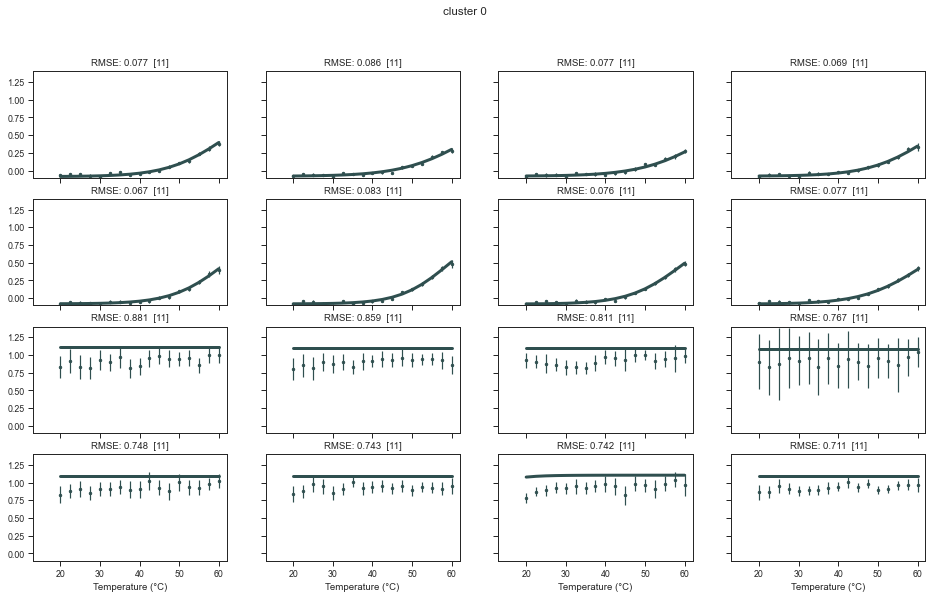

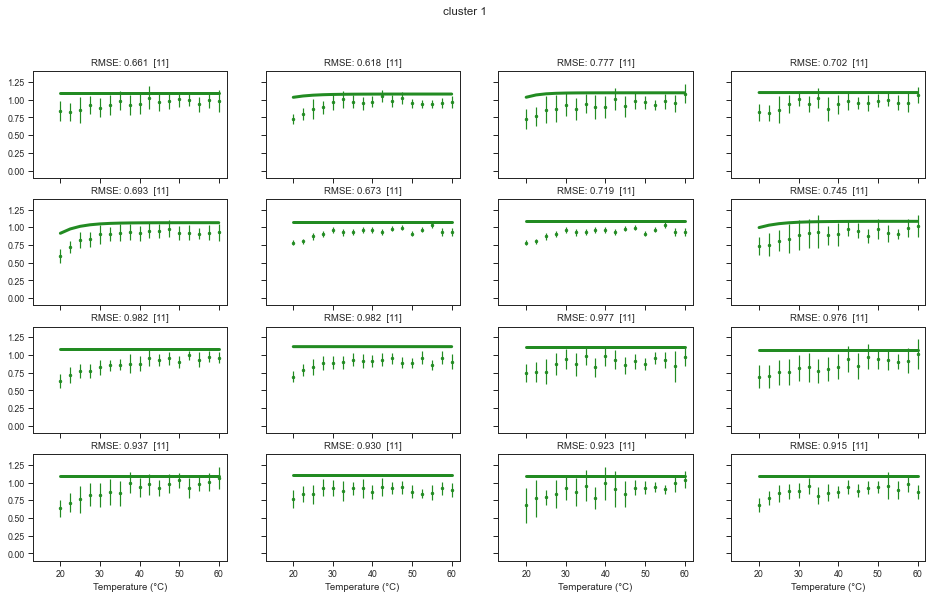

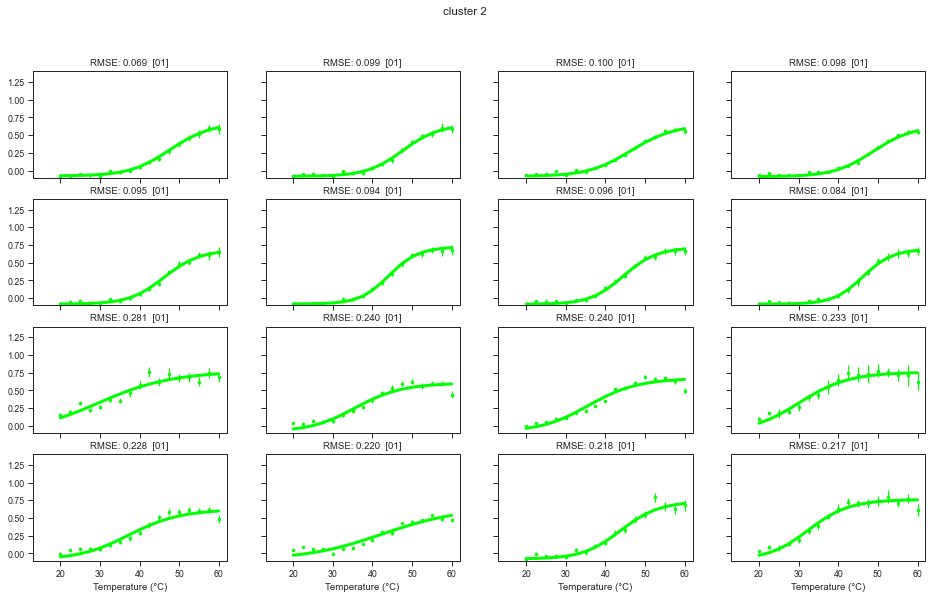

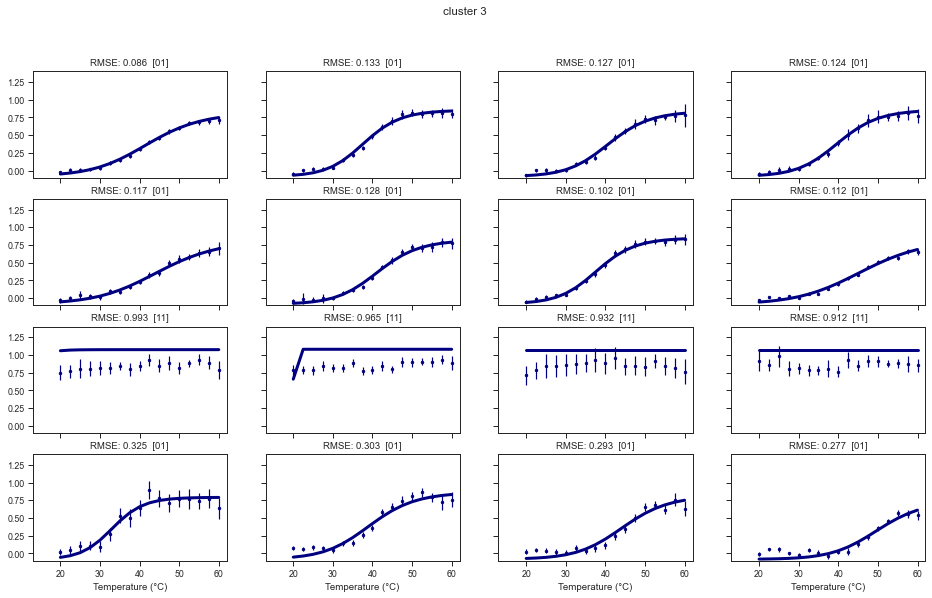

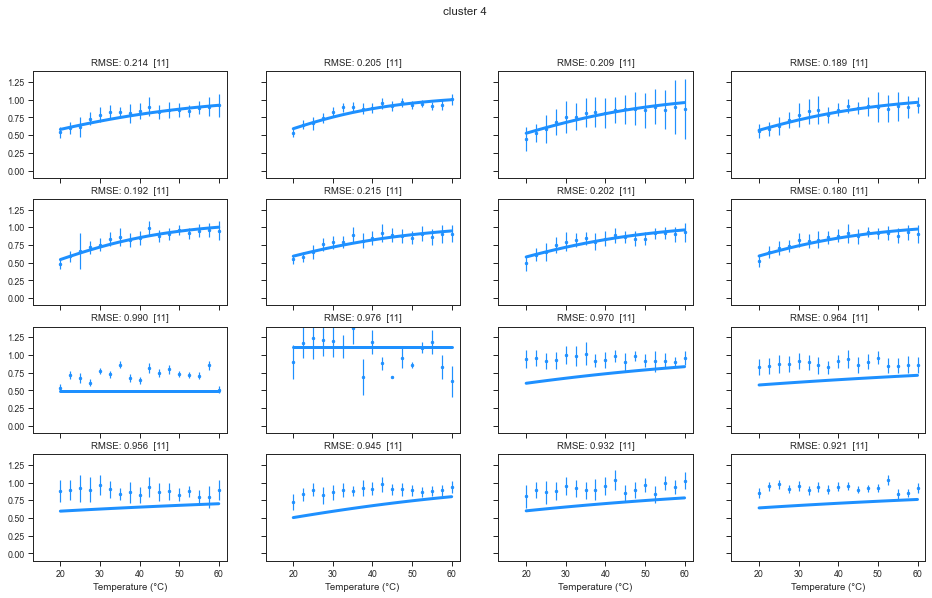

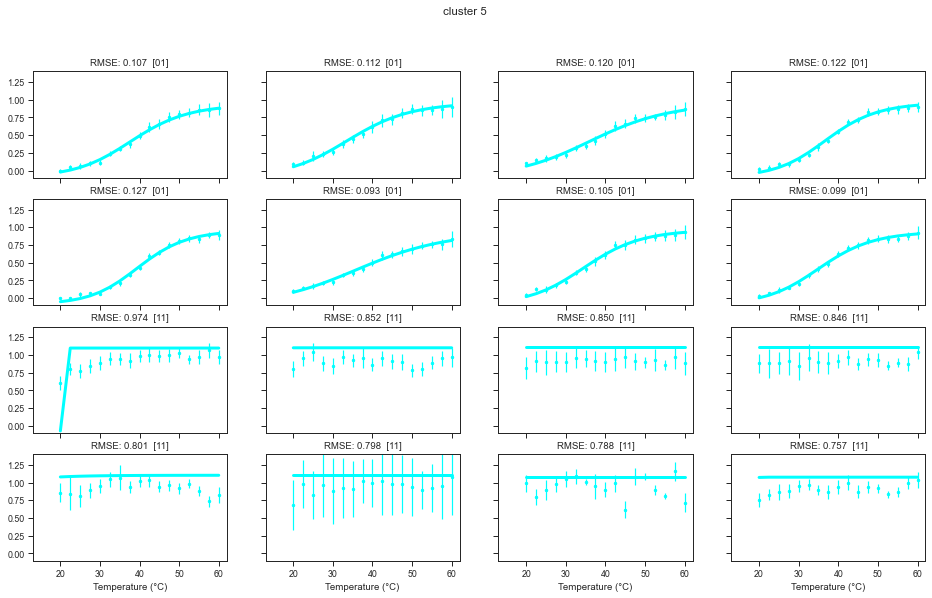

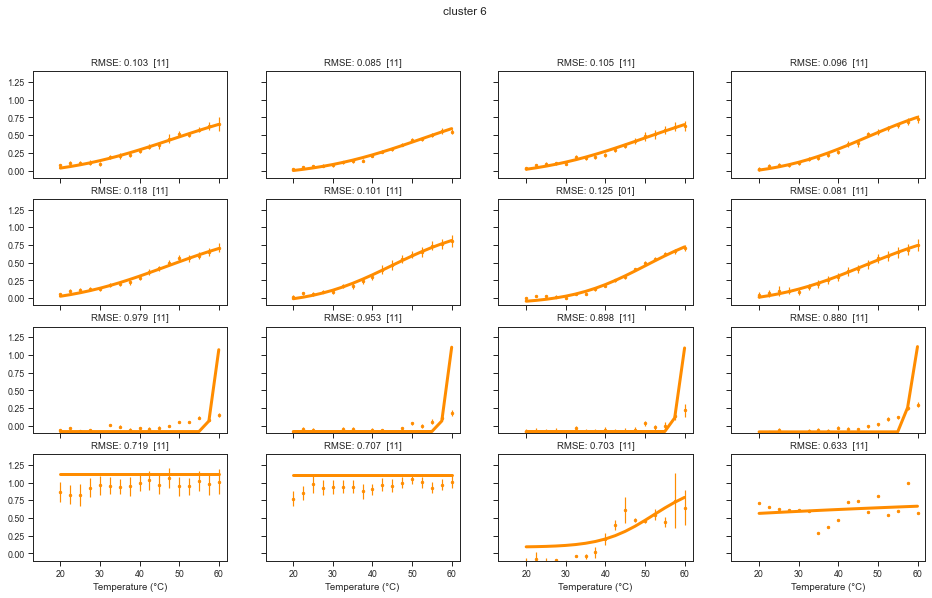

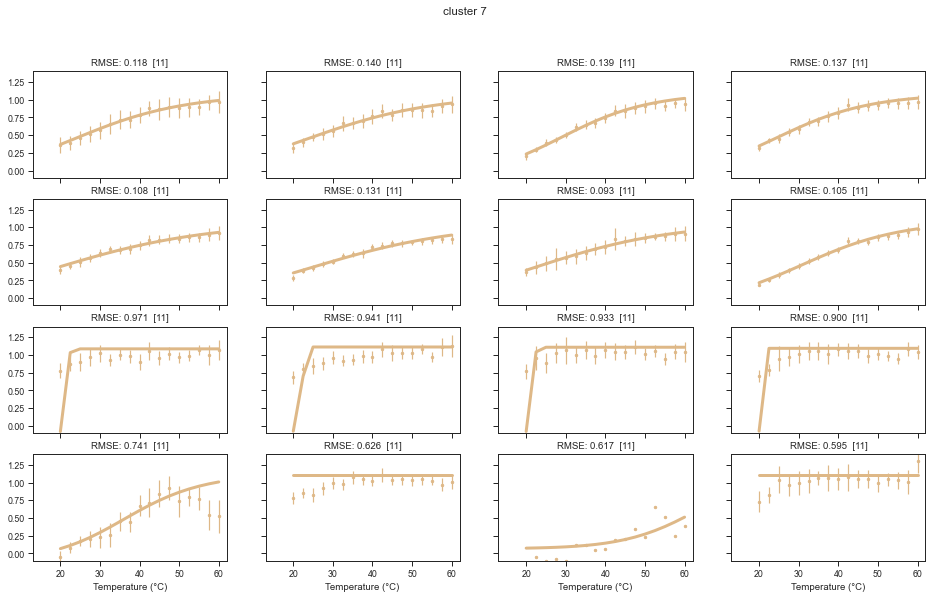

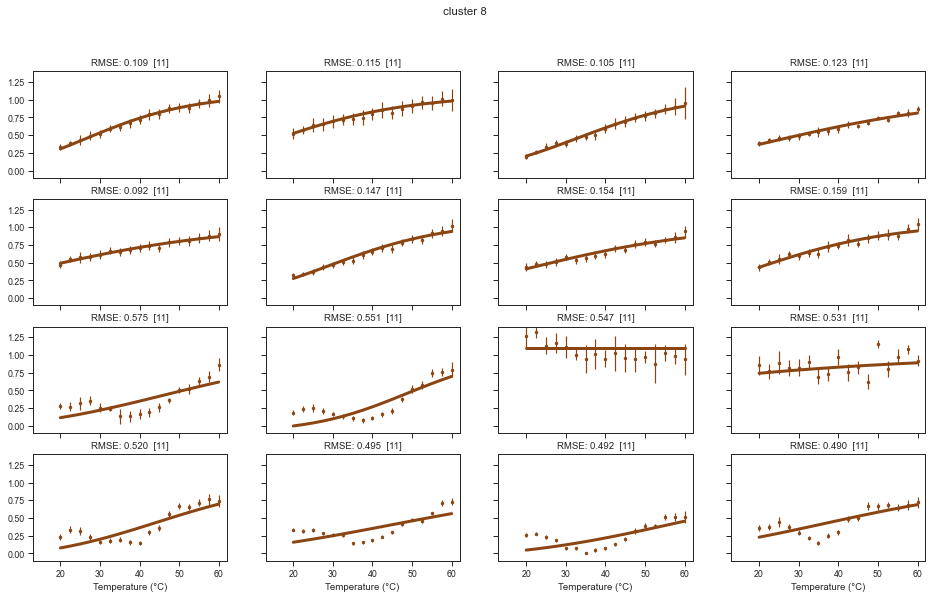

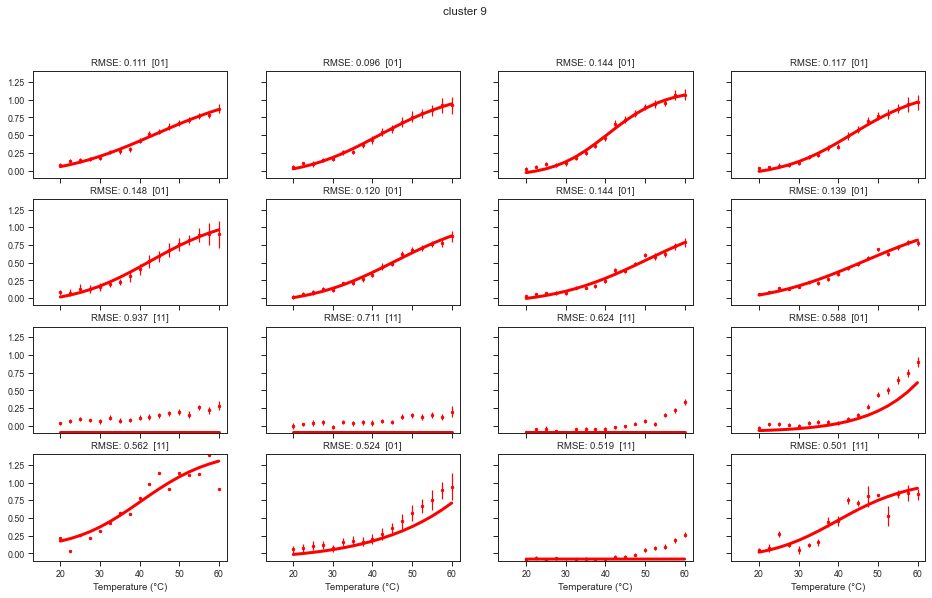

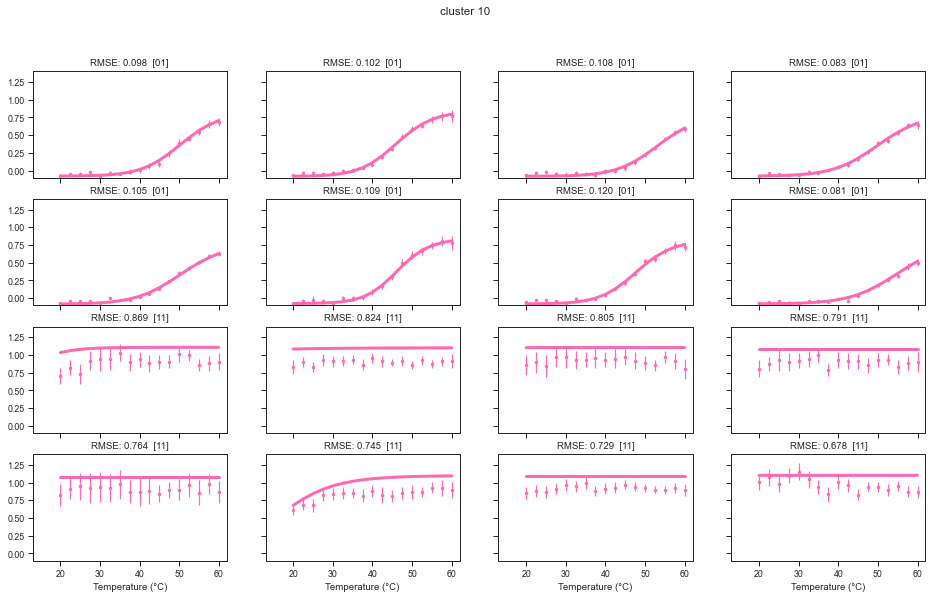

In [51]:
n_variant_plot = 8
representative_id = get_representative_variants(lib2, n_variant=n_variant_plot)
worst_id = get_worst_variants(lib2, n_variant=n_variant_plot)


for i in range(n_cluster):
    fig, ax = plt.subplots(4, 4, sharex=True, sharey=True , figsize=(16,9))
    ax = ax.flatten()
#     plt.title('cluster %d' % i)
    
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.iloc[representative_id[i,j], :], ax[j], c=lbl_color_map['%02d'%i])
        
        
    for j in range(n_variant_plot):
        plot_actual_and_expected_fit(lib2.loc[worst_id[i,j]], ax[j + n_variant_plot], c=lbl_color_map['%02d'%i])
        if j >= 4:
            ax[j + n_variant_plot].set_xlabel('Temperature (°C)')
        
    plt.suptitle('cluster %d' % i)
    save_fig('./fig/worst_and_representative_melting_curves_cluster%02d_v5.pdf' % i)

# fig.show()

/Users/yuxi/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



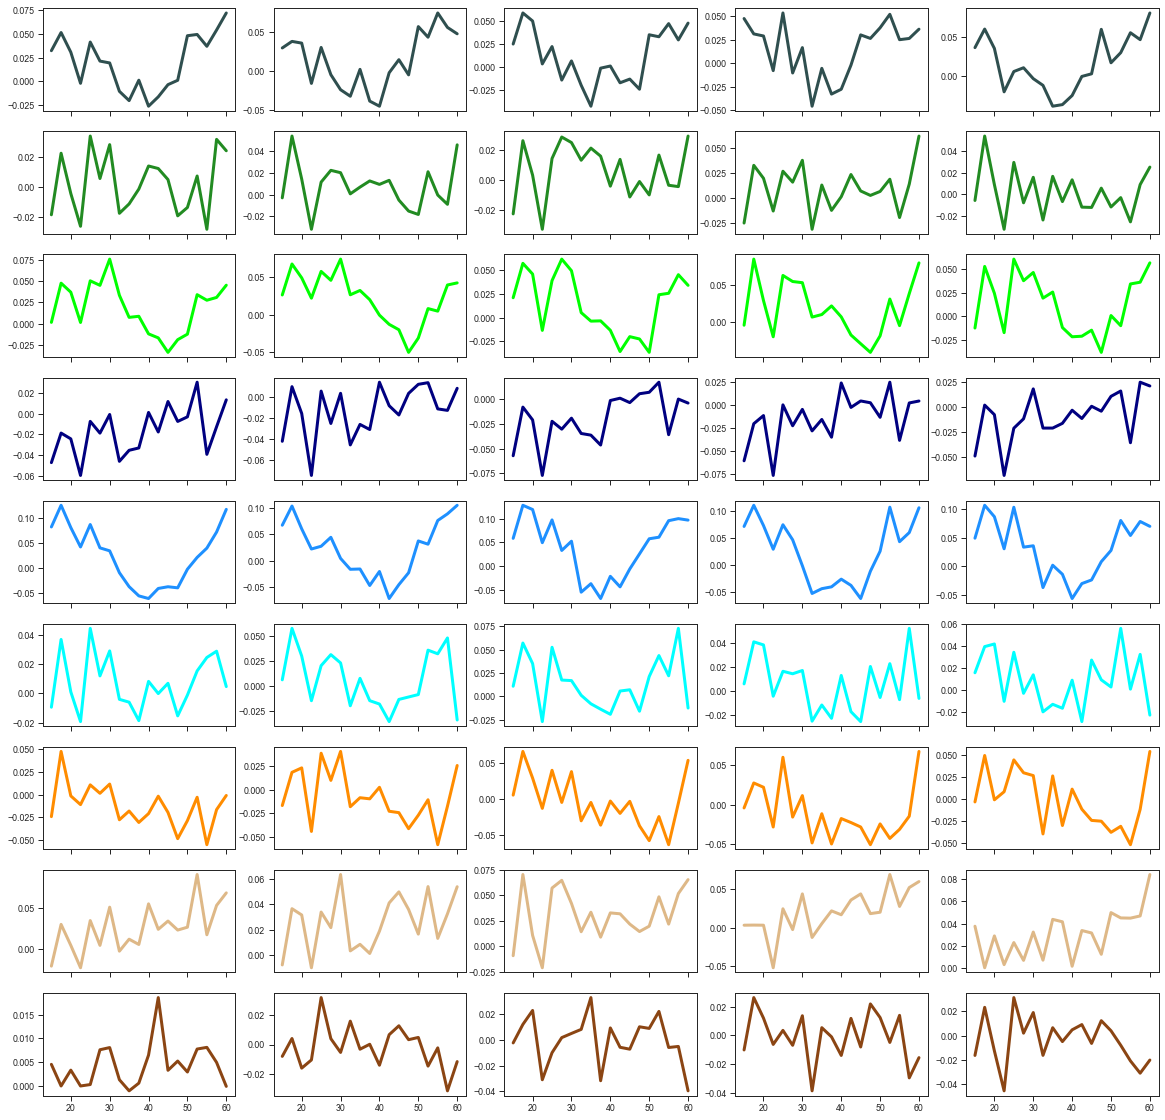

In [47]:
n_variant_plot = 5
variant_id = get_representative_variants(lib2.iloc[:,:])

fig, ax = plt.subplots(n_cluster, n_variant_plot, sharex=True, sharey=False , figsize=(20,20))
# fig.suptitle('Representative resuduals of each cluster')
for i in range(n_cluster):
    for j in range(n_variant_plot):
        ax[i,j].plot(T_celsius, lib2.iloc[variant_id[i,j]][residual_conds], color=lbl_color_map[str(i)], lw=3)
#         ax[i,j].set_ylim
fig.show()